<h3>Loading and Displaying the Data </h3>

In [1136]:
import pandas as pd

# Loading the CSV 
data_path = 'world-data-2023.csv'  
data = pd.read_csv(data_path)

# Selected specific columns
selected_columns = [
    'Country', 
    'GDP',
    'Birth Rate',
    'Physicians per thousand',
    'Gross tertiary education enrollment (%)',
    'Out of pocket health expenditure',
    'Infant mortality',
    'Tax revenue (%)', 
    'Life expectancy'
]

# Update the DataFrame to only include selected columns
data = data[selected_columns]

<h4>Theoretical Framework</h4>

<h5>Countries Excelling in Sustainability and Quality of Life Metrics</h5>
<ul>
    <li>
        <h5>Country</h5>
        <ul>
            <li><strong>Why Included:</strong> The country provides a geographical frame of reference for the data.</li>
            <li><strong>Usage:</strong> Used as the primary identifier for data aggregation and comparison. It serves as a categorical variable in analyses.</li>
        </ul>
    </li>
    <li>
        <h5>Life Expectancy</h5>
        <ul>
            <li><strong>Why Included:</strong> Life expectancy is a critical indicator of overall public health and quality of life, reflecting the effectiveness of a nation's healthcare and environmental policies.</li>
            <li><strong>Usage:</strong> Utilized as a measure to evaluate the success of national health systems and policies. It is considered a dependent variable in the study.</li>
        </ul>
    </li>
    <li>
        <h5>GDP</h5>
        <ul>
            <li><strong>Why Included:</strong> Represents the economic strength of a country, which may impact its infrastructure, including healthcare and sustainable practices.</li>
            <li><strong>Usage:</strong> Examined to assess economic influences on public health and sustainability. Serves as an independent variable.</li>
        </ul>
    </li>
    <li>
        <h5>Birth Rate</h5>
        <ul>
            <li><strong>Why Included:</strong> Reflects the population growth rate, which can have significant implications on national resources and health systems.</li>
            <li><strong>Usage:</strong> Considered in analyses to understand demographic pressures on health and sustainability. Acts as an independent variable.</li>
        </ul>
    </li>
    <li>
        <h5>Physicians per Thousand</h5>
        <ul>
            <li><strong>Why Included:</strong> Indicates the availability of medical professionals, which is vital for ensuring public health.</li>
            <li><strong>Usage:</strong> Analyzed to gauge healthcare access and quality. Classified as an independent variable.</li>
        </ul>
    </li>
    <li>
        <h5>Out of Pocket Health Expenditure (%)</h5>
        <ul>
            <li><strong>Why Included:</strong> Measures the economic burden of health expenses borne directly by individuals, impacting their health access and outcomes.</li>
            <li><strong>Usage:</strong> Evaluated to understand financial constraints on accessing healthcare. Positioned as an independent variable.</li>
        </ul>
    </li>
    <li>
        <h5>Infant Mortality</h5>
        <ul>
            <li><strong>Why Included:</strong> Serves as a fundamental indicator of healthcare effectiveness and overall societal health.</li>
            <li><strong>Usage:</strong> Utilized to assess the health environment of a nation. Defined as an independent variable in the framework.</li>
        </ul>
    </li>
</ul>


<h3>Cleaning the Data</h3>

In [1137]:
# Remove commas and dollar signs from GDP, then convert to numeric
data['GDP'] = pd.to_numeric(data['GDP'].str.replace(',', '').str.replace('$', ''), errors='coerce')


# Converting percentages to decimals for 'Out of pocket health expenditure (%)'
data['Out of pocket health expenditure'] = pd.to_numeric(data['Out of pocket health expenditure'].str.rstrip('%'), errors='coerce') / 100

# Converting Infant Mortality to numeric
data['Infant mortality'] = pd.to_numeric(data['Infant mortality'], errors='coerce')

# Converting Life Expectancy to numeric
data['Life expectancy'] = pd.to_numeric(data['Life expectancy'], errors='coerce')

# Additional conversions for columns identified with non-numeric percentage values:
# Converting 'Gross tertiary education enrollment (%)' and 'Tax revenue (%)' from percentage strings to decimals
data['Gross tertiary education enrollment (%)'] = pd.to_numeric(data['Gross tertiary education enrollment (%)'].str.rstrip('%'), errors='coerce') / 100
data['Tax revenue (%)'] = pd.to_numeric(data['Tax revenue (%)'].str.rstrip('%'), errors='coerce') / 100


In [1138]:
for column in data.columns:
    # Check if the column data type is numeric
    if pd.api.types.is_numeric_dtype(data[column]):
        print(f"{column} is fully numeric.")
    else:
        # If not all entries are numeric, check for non-numeric values
        non_numeric_values = data[column][~data[column].astype(str).str.isnumeric()]
        if not non_numeric_values.empty:
            print(f"{column} contains non-numeric values:")
            print(non_numeric_values)
        else:
            print(f"{column} is fully numeric but may contain formatted numbers or NaNs.")


Country contains non-numeric values:
0      Afghanistan
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
190      Venezuela
191        Vietnam
192          Yemen
193         Zambia
194       Zimbabwe
Name: Country, Length: 195, dtype: object
GDP is fully numeric.
Birth Rate is fully numeric.
Physicians per thousand is fully numeric.
Gross tertiary education enrollment (%) is fully numeric.
Out of pocket health expenditure is fully numeric.
Infant mortality is fully numeric.
Tax revenue (%) is fully numeric.
Life expectancy is fully numeric.


In [1139]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing values before handling:")
print(missing_values)

Missing values before handling:
Country                                     0
GDP                                         2
Birth Rate                                  6
Physicians per thousand                     7
Gross tertiary education enrollment (%)    12
Out of pocket health expenditure            7
Infant mortality                            6
Tax revenue (%)                            26
Life expectancy                             8
dtype: int64


<h4>Dealing with empty rows</h4>

In [1140]:
from sklearn.impute import SimpleImputer

# Store indices of rows with missing values
missing_indices_before = data[data.isnull().any(axis=1)].index

# Handling missing values
# Imputation
impute_columns = ['Life expectancy', 'GDP', 'Birth Rate', 'Physicians per thousand', 'Out of pocket health expenditure', 'Infant mortality']
imputer = SimpleImputer(strategy='mean')
data[impute_columns] = imputer.fit_transform(data[impute_columns])

# Dropping Rows
# If further data integrity is required, additional rows can be dropped if necessary. For now, we impute missing values for key columns.
dropped_rows = data[data.isnull().any(axis=1)]
if not dropped_rows.empty:
    data.dropna(inplace=True)

# Print the dropped rows and notice about data availability
print("\nRows dropped due to missing values:")
print(dropped_rows)

# Notice about specific country data availability
print("\nThe data for the following country doesn't exist and therefore cannot be included in the dataset. This could be checked on the following portal: https://data.worldbank.org/indicator/GC.TAX.TOTL.GD.ZS?end=2023&locations=CU&most_recent_value_desc=false&start=2000&view=chart")

# Check missing values after handling
missing_values_after = data.isnull().sum()
print("\nMissing values after handling:")
print(missing_values_after)



Rows dropped due to missing values:
                            Country       GDP  Birth Rate  Physicians per thousand  \
3                           Andorra  3.15e+09        7.20                     3.33   
20                          Bolivia  4.09e+10       21.75                     1.59   
24                           Brunei  1.35e+10       14.90                     1.61   
34                             Chad  1.13e+10       42.17                     0.04   
38                          Comoros  1.19e+09       31.88                     0.27   
42                             Cuba  1.00e+11       10.17                     8.42   
47                         Djibouti  3.32e+09       21.47                     0.22   
50                          Ecuador  1.07e+11       19.72                     2.04   
54                          Eritrea  2.07e+09       30.30                     0.06   
56                         Eswatini  3.79e+09       20.21                     1.84   
71               

In [1141]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing values before handling:")
print(missing_values)

Missing values before handling:
Country                                    0
GDP                                        0
Birth Rate                                 0
Physicians per thousand                    0
Gross tertiary education enrollment (%)    0
Out of pocket health expenditure           0
Infant mortality                           0
Tax revenue (%)                            0
Life expectancy                            0
dtype: int64


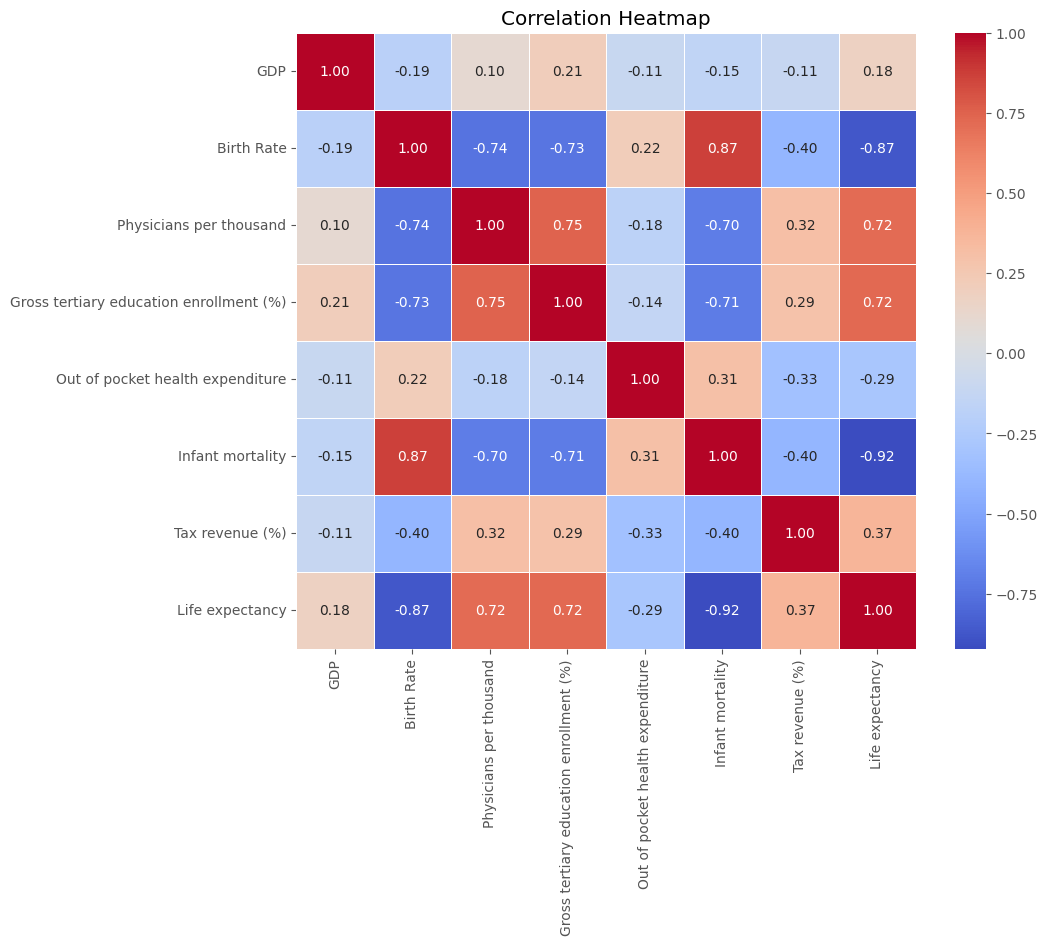

In [1142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns from the correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


C:\Users\serge\AppData\Local\Temp\ipykernel_10320\630927625.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variable, y='Country', data=top_10, ax=ax, palette=color_palette)
C:\Users\serge\AppData\Local\Temp\ipykernel_10320\630927625.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variable, y='Country', data=top_10, ax=ax, palette=color_palette)
C:\Users\serge\AppData\Local\Temp\ipykernel_10320\630927625.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variable, y='Country', data=top_10, ax=ax, palette=color_palette)
C:\User

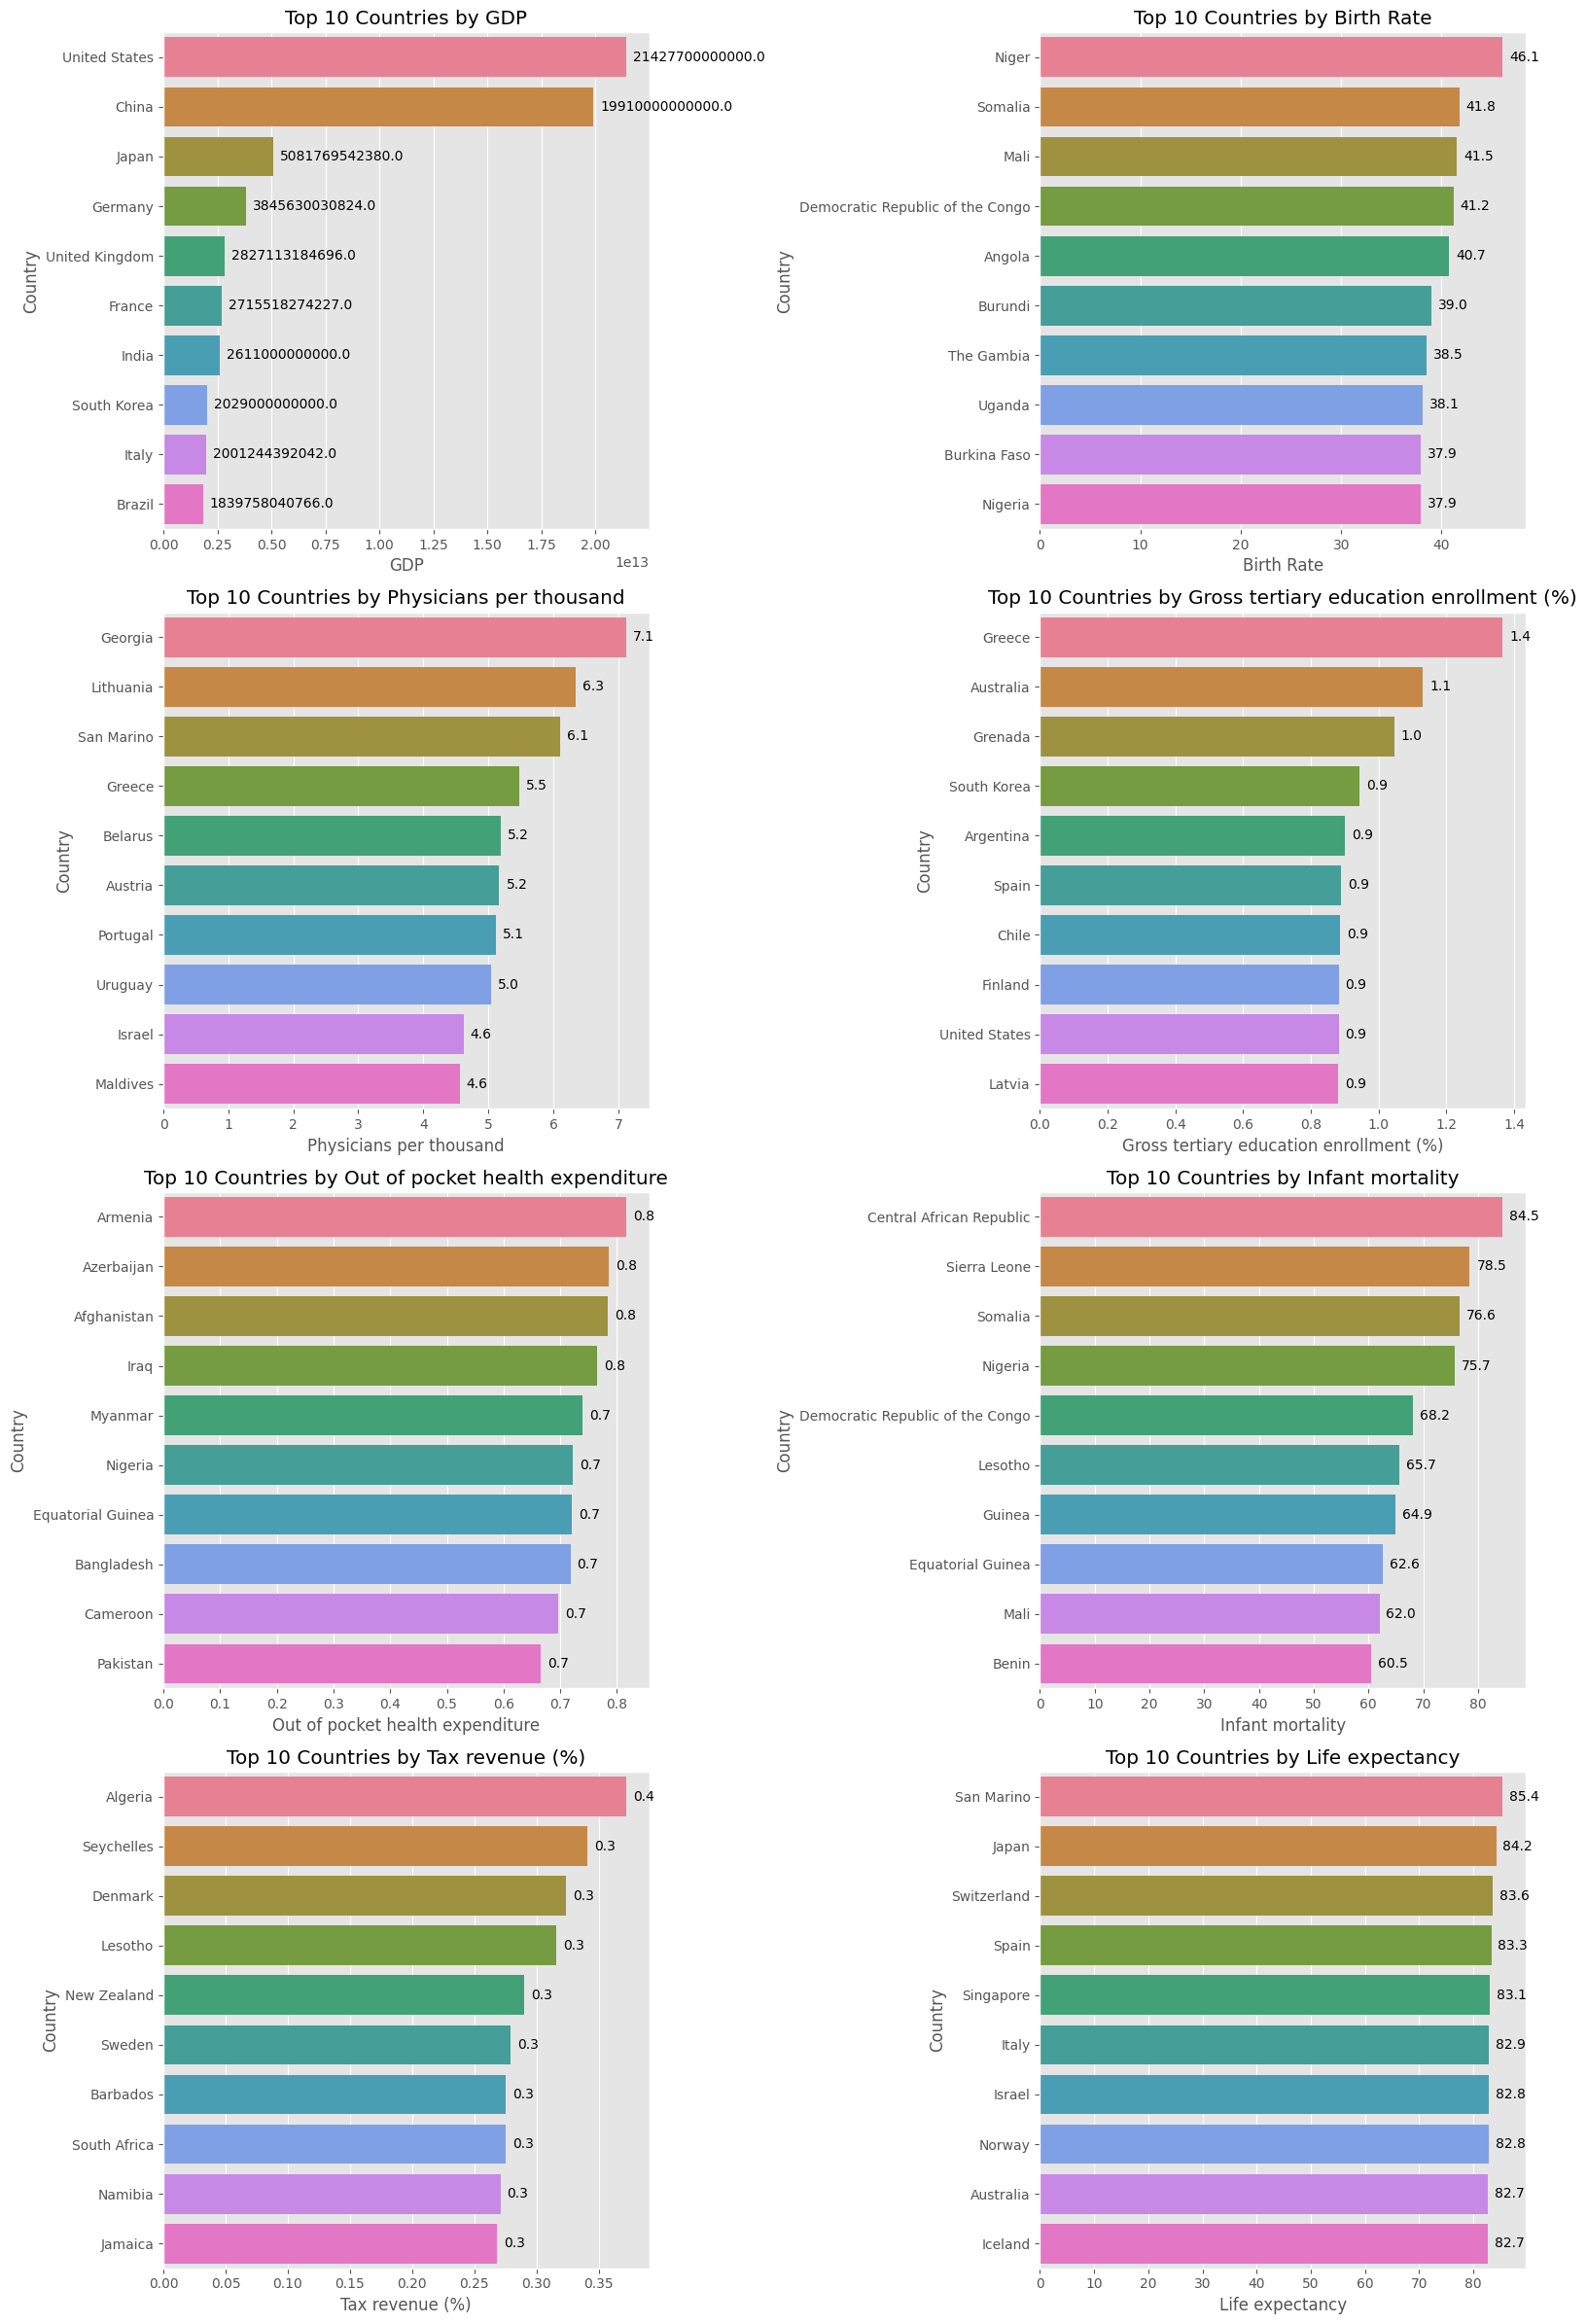

In [1143]:
def plot_top_10(variable, data, ax):
    top_10 = data.nlargest(10, variable)
   
    color_palette = sns.color_palette("husl", len(top_10))  
    sns.barplot(x=variable, y='Country', data=top_10, ax=ax, palette=color_palette)
    ax.set_title(f'Top 10 Countries by {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Country')
   
    for p in ax.patches:
        ax.annotate(format(p.get_width(), '.1f'), 
                    (p.get_width(), p.get_y() + p.get_height() / 2.), 
                    ha = 'left', va = 'center', 
                    xytext = (5, 0), 
                    textcoords = 'offset points')


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 24)) 
axes = axes.flatten()  

variables_to_plot = [
    'GDP',
    'Birth Rate',
    'Physicians per thousand',
    'Gross tertiary education enrollment (%)',
    'Out of pocket health expenditure',
    'Infant mortality',
    'Tax revenue (%)',
    'Life expectancy'
]

# Loop through the variables and create a plot for each
for i, var in enumerate(variables_to_plot):
    plot_top_10(var, data, axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<h3>Scatter Plots</h3>

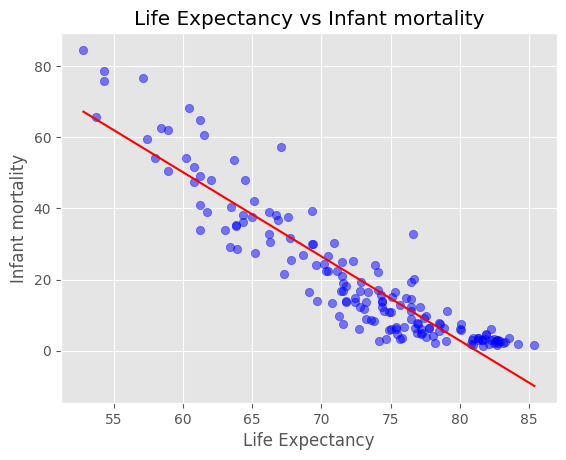

In [1144]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Scatter plot for Life Expectancy vs Agricultural Land (%)
plt.title('Life Expectancy vs Infant mortality')
plt.xlabel('Life Expectancy')
plt.ylabel('Infant mortality')
plt.scatter(data['Life expectancy'], data['Infant mortality'], color='blue', alpha=0.5)

# Calculating the best fit line using linear regression (first-degree polynomial)
slope, intercept = np.polyfit(data['Life expectancy'], data['Infant mortality'], 1)
line = slope * np.unique(data['Life expectancy']) + intercept

plt.plot(np.unique(data['Life expectancy']), line, color='red')
plt.show()


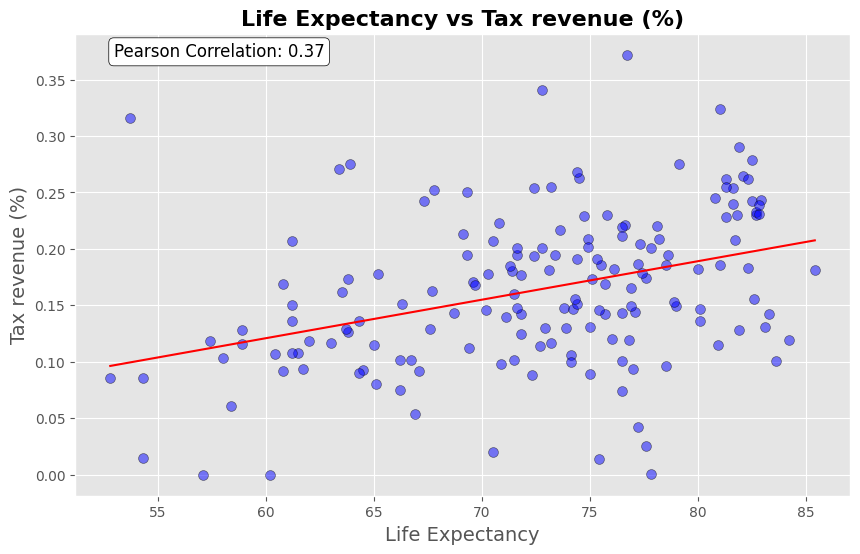

In [1172]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Use a universally accepted matplotlib style
plt.style.use('ggplot')  # 'ggplot' is a popular, visually appealing style

# Create a figure and axis with a specified size
plt.figure(figsize=(10, 6))

# Title and labels with font sizes
plt.title('Life Expectancy vs Tax revenue (%)', fontsize=16, fontweight='bold')
plt.xlabel('Life Expectancy', fontsize=14)
plt.ylabel('Tax revenue (%)', fontsize=14)

# Scatter plot with enhanced appearance
plt.scatter(data['Life expectancy'], data['Tax revenue (%)'], color='blue', alpha=0.5, edgecolor='black', s=50)

# Calculate the best fit line using linear regression (first-degree polynomial)
slope, intercept = np.polyfit(data['Life expectancy'], data['Tax revenue (%)'], 1)
line = slope * np.unique(data['Life expectancy']) + intercept

# Plotting the best fit line with a label for the legend
plt.plot(np.unique(data['Life expectancy']), line, color='red', label=f'Fit Line: {slope:.2f}x + {intercept:.2f}')


# Calculate and display the Pearson correlation coefficient
corr, _ = pearsonr(data['Life expectancy'], data['Tax revenue (%)'])
plt.annotate(f'Pearson Correlation: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

# Show the plot
plt.show()


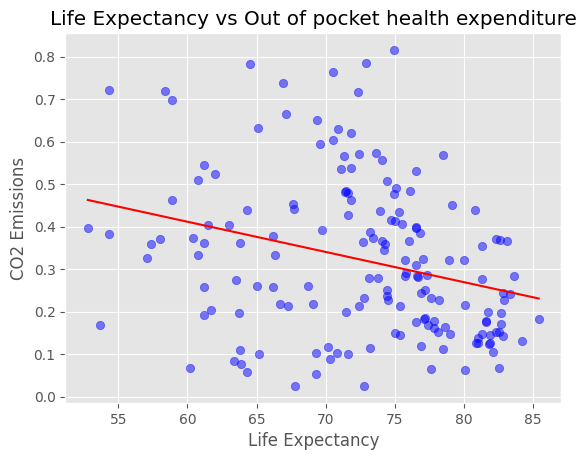

In [1146]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Scatter plot for Life Expectancy vs CO2 Emissions
plt.title('Life Expectancy vs Out of pocket health expenditure')
plt.xlabel('Life Expectancy')
plt.ylabel('CO2 Emissions')
plt.scatter(data['Life expectancy'], data['Out of pocket health expenditure'], color='blue', alpha=0.5)

# Calculating the best fit line using linear regression (first-degree polynomial)
slope, intercept = np.polyfit(data['Life expectancy'], data['Out of pocket health expenditure'], 1)
line = slope * np.unique(data['Life expectancy']) + intercept

plt.plot(np.unique(data['Life expectancy']), line, color='red')
plt.show()


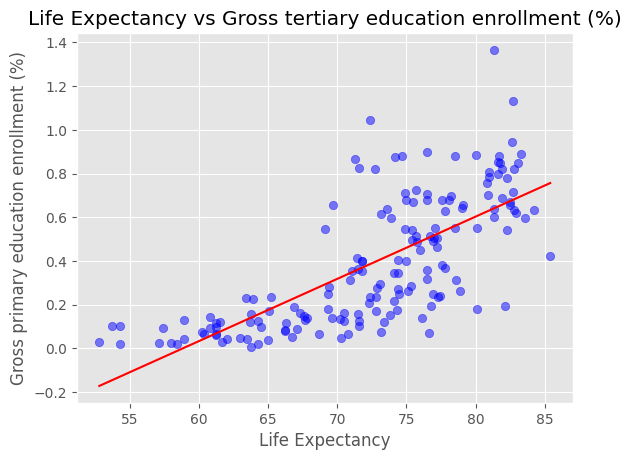

In [1147]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Scatter plot for Life Expectancy vs Gross primary education enrollment (%)
plt.title('Life Expectancy vs Gross tertiary education enrollment (%)')
plt.xlabel('Life Expectancy')
plt.ylabel('Gross primary education enrollment (%)')
plt.scatter(data['Life expectancy'], data['Gross tertiary education enrollment (%)'], color='blue', alpha=0.5)

# Calculating the best fit line using linear regression (first-degree polynomial)
slope, intercept = np.polyfit(data['Life expectancy'], data['Gross tertiary education enrollment (%)'], 1)
line = slope * np.unique(data['Life expectancy']) + intercept

plt.plot(np.unique(data['Life expectancy']), line, color='red')
plt.show()

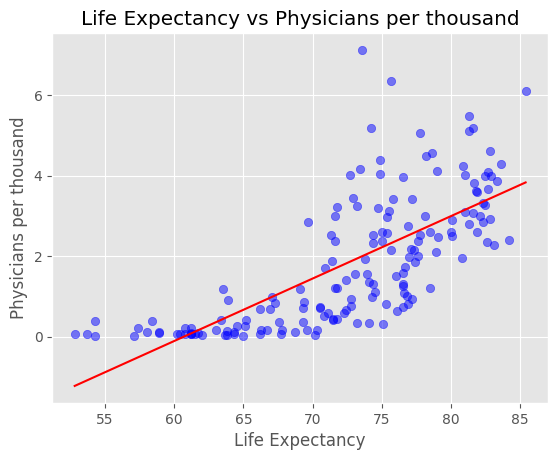

In [1148]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Scatter plot for Life Expectancy vs Tax revenue (%)
plt.title('Life Expectancy vs Physicians per thousand')
plt.xlabel('Life Expectancy')
plt.ylabel('Physicians per thousand')
plt.scatter(data['Life expectancy'], data['Physicians per thousand'], color='blue', alpha=0.5)

# Calculating the best fit line using linear regression (first-degree polynomial)
slope, intercept = np.polyfit(data['Life expectancy'], data['Physicians per thousand'], 1)
line = slope * np.unique(data['Life expectancy']) + intercept

plt.plot(np.unique(data['Life expectancy']), line, color='red')
plt.show()

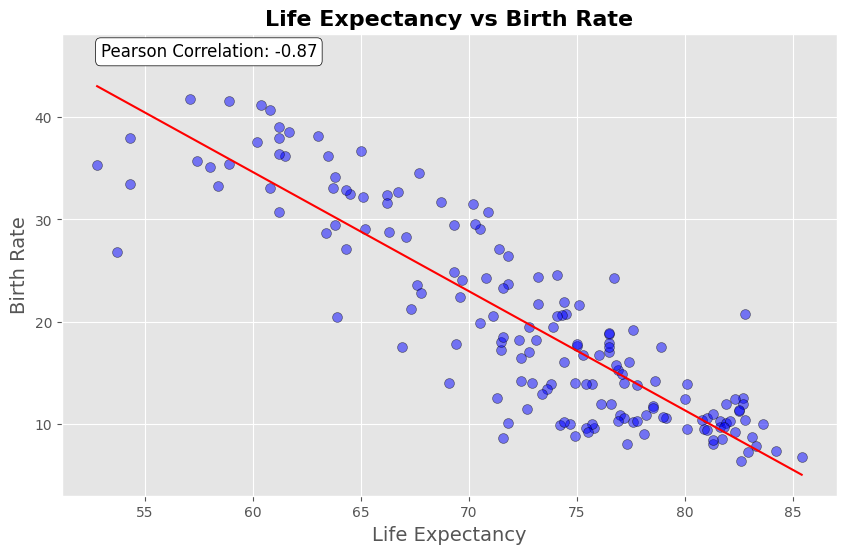

In [1149]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr

plt.style.use('ggplot')  # 'ggplot' is a popular, visually appealing style

plt.figure(figsize=(10, 6))
plt.title('Life Expectancy vs Birth Rate', fontsize=16, fontweight='bold')
plt.xlabel('Life Expectancy', fontsize=14)
plt.ylabel('Birth Rate', fontsize=14)
plt.scatter(data['Life expectancy'], data['Birth Rate'], color='blue', alpha=0.5, edgecolor='black', s=50)

# Calculate the best fit line using linear regression (first-degree polynomial)
slope, intercept = np.polyfit(data['Life expectancy'], data['Birth Rate'], 1)
line = slope * np.unique(data['Life expectancy']) + intercept

plt.plot(np.unique(data['Life expectancy']), line, color='red', label=f'Fit Line: {slope:.2f}x + {intercept:.2f}')


corr, _ = pearsonr(data['Life expectancy'], data['Birth Rate'])
plt.annotate(f'Pearson Correlation: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

# Show the plot
plt.show()


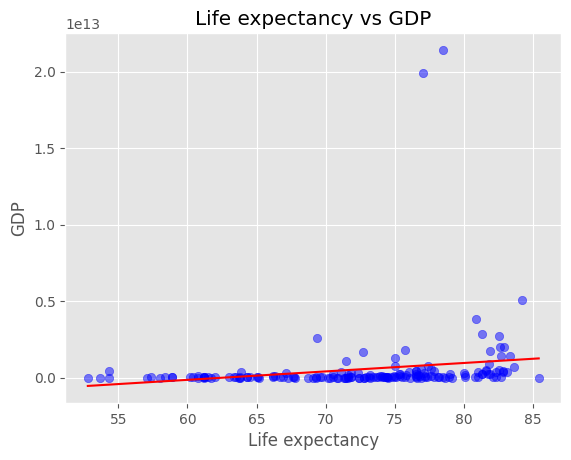

In [1150]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Scatter plot for Agricultural Land (%) vs Tax revenue (%)
plt.title('Life expectancy vs GDP')
plt.xlabel('Life expectancy')
plt.ylabel('GDP')
plt.scatter(data['Life expectancy'], data['GDP'], color='blue', alpha=0.5)

# Calculating the best fit line using linear regression (first-degree polynomial)
slope, intercept = np.polyfit(data['Life expectancy'], data['GDP'], 1)
line = slope * np.unique(data['Life expectancy']) + intercept

plt.plot(np.unique(data['Life expectancy']), line, color='red')
plt.show()

In [1151]:
from scipy.stats import pearsonr

# List of independent variables as clarified
independent_variables = [
    'GDP',  
    'Birth Rate',  
    'Physicians per thousand',  
    'Gross tertiary education enrollment (%)',  
    'Out of pocket health expenditure',  # Corrected to include the percentage symbol if it exists in your dataset
    'Infant mortality',  
    'Tax revenue (%)'
]

# Dependent variable
dependent_variable = 'Life expectancy'

# Iterate over independent variables
for variable in independent_variables:
    # Ensure no NaN values which can raise errors in correlation computation
    filtered_data = data.dropna(subset=[variable, dependent_variable])
    
    # Calculate Pearson correlation coefficient and p-value
    correlation_coefficient, p_value = pearsonr(filtered_data[variable], filtered_data[dependent_variable])
    print(f"Correlation coefficient between {variable} and {dependent_variable}: {correlation_coefficient}")
    print(f"P-value: {p_value}")
    print()


Correlation coefficient between GDP and Life expectancy: 0.17697055710349088
P-value: 0.022970508727593722

Correlation coefficient between Birth Rate and Life expectancy: -0.8745054431593946
P-value: 4.273726344531146e-53

Correlation coefficient between Physicians per thousand and Life expectancy: 0.7174638542588804
P-value: 2.2019382895156363e-27

Correlation coefficient between Gross tertiary education enrollment (%) and Life expectancy: 0.7230861070145489
P-value: 5.542883103722425e-28

Correlation coefficient between Out of pocket health expenditure and Life expectancy: -0.2901434436193871
P-value: 0.0001566560034769729

Correlation coefficient between Infant mortality and Life expectancy: -0.921790631681119
P-value: 5.658727777945073e-69

Correlation coefficient between Tax revenue (%) and Life expectancy: 0.371760736809338
P-value: 8.814352528442296e-07




<title>Correlation Results</title>
    <h1>Correlation Results</h1>
    <ul>
        <li>
            <strong>GDP and Life Expectancy:</strong>
            <ul>
                <li><strong>Correlation Coefficient:</strong> 0.177</li>
                <li><strong>P-value:</strong> 0.023</li>
                <li><strong>Interpretation:</strong> There is a weak positive correlation between GDP and life expectancy. This suggests that as the economic output of a country increases, there might be a slight improvement in life expectancy, possibly due to better healthcare and living conditions. The statistical significance indicates that this relationship is likely not due to random chance.</li>
            </ul>
        </li>
        <li>
            <strong>Birth Rate and Life Expectancy:</strong>
            <ul>
                <li><strong>Correlation Coefficient:</strong> -0.875</li>
                <li><strong>P-value:</strong> Close to 0</li>
                <li><strong>Interpretation:</strong> There is a strong negative correlation between birth rate and life expectancy. High birth rates are typically associated with lower life expectancy, possibly reflecting inadequate healthcare resources or economic strain in countries with high fertility rates. This result is highly statistically significant.</li>
            </ul>
        </li>
        <li>
            <strong>Physicians per Thousand and Life Expectancy:</strong>
            <ul>
                <li><strong>Correlation Coefficient:</strong> 0.717</li>
                <li><strong>P-value:</strong> Close to 0</li>
                <li><strong>Interpretation:</strong> A strong positive correlation indicates that higher numbers of physicians per thousand people are associated with increased life expectancy. This relationship suggests that better access to healthcare professionals significantly improves health outcomes.</li>
            </ul>
        </li>
        <li>
            <strong>Gross Tertiary Education Enrollment (%) and Life Expectancy:</strong>
            <ul>
                <li><strong>Correlation Coefficient:</strong> 0.723</li>
                <li><strong>P-value:</strong> Close to 0</li>
                <li><strong>Interpretation:</strong> There is a strong positive correlation, suggesting that higher levels of tertiary education enrollment are associated with higher life expectancy. This may reflect the broader health and economic benefits of higher education, including better health knowledge and behaviors.</li>
            </ul>
        </li>
        <li>
            <strong>Out of Pocket Health Expenditure and Life Expectancy:</strong>
            <ul>
                <li><strong>Correlation Coefficient:</strong> -0.290</li>
                <li><strong>P-value:</strong> 0.000157</li>
                <li><strong>Interpretation:</strong> A moderate negative correlation suggests that higher out-of-pocket health expenditures are associated with lower life expectancy. This could indicate that excessive personal health expenses without adequate insurance or public health support might limit access to necessary care.</li>
            </ul>
        </li>
        <li>
            <strong>Infant Mortality and Life Expectancy:</strong>
            <ul>
                <li><strong>Correlation Coefficient:</strong> -0.922</li>
                <li><strong>P-value:</strong> Close to 0</li>
                <li><strong>Interpretation:</strong> There is a very strong negative correlation, indicating that higher rates of infant mortality are associated with lower life expectancy. This relationship underscores the importance of effective healthcare for infants as a determinant of overall population health.</li>
            </ul>
        </li>
        <li>
            <strong>Tax Revenue (%) and Life Expectancy:</strong>
            <ul>
                <li><strong>Correlation Coefficient:</strong> 0.372</li>
                <li><strong>P-value:</strong> Close to 0</li>
                <li><strong>Interpretation:</strong> A moderate positive correlation suggests that higher tax revenue as a percentage of GDP may correlate with higher life expectancy, potentially reflecting better governmental capacity to fund public services, including healthcare.</li>
            </ul>
        </li>
    </ul>



In [1152]:
from scipy.stats import pearsonr

# List of independent variables that we have discussed using
independent_variables = [
    'GDP',  
    'Birth Rate',  
    'Physicians per thousand',  
    'Gross tertiary education enrollment (%)',  
    'Out of pocket health expenditure',  
    'Infant mortality',  
    'Tax revenue (%)'
]

# Iterate over pairs of independent variables
for i in range(len(independent_variables)):
    for j in range(i+1, len(independent_variables)):
        # Ensure no NaN values which can raise errors in correlation computation
        filtered_data = data.dropna(subset=[independent_variables[i], independent_variables[j]])
        
        # Calculate Pearson correlation coefficient and p-value
        correlation_coefficient, p_value = pearsonr(filtered_data[independent_variables[i]], filtered_data[independent_variables[j]])
        print(f"Correlation coefficient between {independent_variables[i]} and {independent_variables[j]}: {correlation_coefficient}")
        print(f"P-value: {p_value}")
        print()


Correlation coefficient between GDP and Birth Rate: -0.18755507720892545
P-value: 0.015851341301961724

Correlation coefficient between GDP and Physicians per thousand: 0.1000380300669885
P-value: 0.2010900004227162

Correlation coefficient between GDP and Gross tertiary education enrollment (%): 0.20971323606521933
P-value: 0.006862039433293911

Correlation coefficient between GDP and Out of pocket health expenditure: -0.10680298470174249
P-value: 0.17213106413889778

Correlation coefficient between GDP and Infant mortality: -0.15486556112486513
P-value: 0.04701553946683581

Correlation coefficient between GDP and Tax revenue (%): -0.1147633877115301
P-value: 0.14215596908036798

Correlation coefficient between Birth Rate and Physicians per thousand: -0.7434889228343511
P-value: 2.7517858738373883e-30

Correlation coefficient between Birth Rate and Gross tertiary education enrollment (%): -0.734879213784272
P-value: 2.7407009745944565e-29

Correlation coefficient between Birth Rate an

<ol>
    <li>
        <strong>GDP and Birth Rate:</strong><br>
        - Correlation coefficient: -0.187<br>
        - P-value: 0.015<br>
        - Weak negative correlation. Statistically significant. Suggests a slight tendency for countries with higher GDP to have lower birth rates.
    </li>
    <li>
        <strong>GDP and Physicians per Thousand:</strong><br>
        - Correlation coefficient: 0.100<br>
        - P-value: 0.201<br>
        - Weak positive correlation. Not statistically significant. No strong evidence of association between GDP and healthcare availability.
    </li>
    <li>
        <strong>GDP and Gross Tertiary Education Enrollment (%):</strong><br>
        - Correlation coefficient: 0.209<br>
        - P-value: 0.006<br>
        - Weak positive correlation. Statistically significant. Suggests a slight tendency for countries with higher GDP to have higher tertiary education enrollment.
    </li>
    <li>
        <strong>GDP and Out of Pocket Health Expenditure:</strong><br>
        - Correlation coefficient: -0.106<br>
        - P-value: 0.172<br>
        - Weak negative correlation. Not statistically significant. Limited evidence of a relationship between GDP and personal health expenses.
    </li>
    <li>
        <strong>GDP and Infant Mortality:</strong><br>
        - Correlation coefficient: -0.154<br>
        - P-value: 0.047<br>
        - Weak negative correlation. Statistically significant. Higher GDP might correlate with lower infant mortality.
    </li>
    <li>
        <strong>GDP and Tax Revenue (%):</strong><br>
        - Correlation coefficient: -0.114<br>
        - P-value: 0.142<br>
        - Weak negative correlation. Not statistically significant. Little evidence of a relationship between GDP and tax revenue as a percentage of GDP.
    </li>
    <li>
        <strong>Birth Rate and Physicians per Thousand:</strong><br>
        - Correlation coefficient: -0.743<br>
        - P-value: 2.75e-30<br>
        - Strong negative correlation. Highly statistically significant. Indicates a robust inverse relationship between birth rate and healthcare availability.
    </li>
    <li>
        <strong>Birth Rate and Gross Tertiary Education Enrollment (%):</strong><br>
        - Correlation coefficient: -0.734<br>
        - P-value: 2.74e-29<br>
        - Strong negative correlation. Highly statistically significant. Suggests that higher birth rates tend to occur in countries with lower tertiary education enrollment.
    </li>
    <li>
        <strong>Birth Rate and Out of Pocket Health Expenditure:</strong><br>
        - Correlation coefficient: 0.217<br>
        - P-value: 0.005<br>
        - Weak positive correlation. Statistically significant. Suggests that higher birth rates may be associated with higher personal health expenses.
    </li>
    <li>
        <strong>Birth Rate and Infant Mortality:</strong><br>
        - Correlation coefficient: 0.870<br>
        - P-value: 6.32e-52<br>
        - Strong positive correlation. Highly statistically significant. Indicates that higher birth rates are strongly associated with higher infant mortality rates.
        - Note: Due to a very high correlation, Birth Rate is considered redundant with respect to Infant Mortality and will be removed from analyses to avoid multicollinearity.
    </li>
    <li>
        <strong>Birth Rate and Tax Revenue (%):</strong><br>
        - Correlation coefficient: -0.400<br>
        - P-value: 9.65e-08<br>
        - Moderate negative correlation. Highly statistically significant. Higher birth rates may correlate with lower tax revenue as a percentage of GDP.
    </li>
    <li>
        <strong>Physicians per Thousand and Gross Tertiary Education Enrollment (%):</strong><br>
        - Correlation coefficient: 0.750<br>
        - P-value: 4.73e-31<br>
        - Strong positive correlation. Highly statistically significant. Suggests a robust relationship between healthcare availability and higher education levels.
    </li>
    <li>
        <strong>Physicians per Thousand and Out of Pocket Health Expenditure:</strong><br>
        - Correlation coefficient: -0.175<br>
        - P-value: 0.023<br>
        - Weak negative correlation. Statistically significant. More healthcare availability may lead to lower personal health spending.
    </li>
    <li>
        <strong>Physicians per Thousand and Infant Mortality:</strong><br>
        - Correlation coefficient: -0.702<br>
        - P-value: 7.64e-26<br>
        - Strong negative correlation. Highly statistically significant. Indicates that better healthcare availability is strongly associated with lower infant mortality rates.
    </li>
    <li>
        <strong>Physicians per Thousand and Tax Revenue (%):</strong><br>
        - Correlation coefficient: 0.316<br>
        - P-value: 3.54e-05<br>
        - Moderate positive correlation. Statistically significant. Suggests a positive relationship between healthcare availability and tax revenue.
    </li>
    <li>
        <strong>Gross Tertiary Education Enrollment (%) and Out of Pocket Health Expenditure:</strong><br>
        - Correlation coefficient: -0.139<br>
        - P-value: 0.073<br>
        - Weak negative correlation. Marginally statistically significant. Limited evidence that higher education levels might lead to lower personal health expenses.
    </li>
    <li>
        <strong>Gross Tertiary Education Enrollment (%) and Infant Mortality:</strong><br>
        - Correlation coefficient: -0.707<br>
        - P-value: 2.29e-26<br>
        - Strong negative correlation. Highly statistically significant. Suggests that higher education levels are strongly associated with lower infant mortality rates.
    </li>
    <li>
        <strong>Gross Tertiary Education Enrollment (%) and Tax Revenue (%):</strong><br>
        - Correlation coefficient: 0.289<br>
        - P-value: 0.000162<br>
        - Moderate positive correlation. Statistically significant. Higher education levels may correlate with higher tax revenue percentages.
    </li>
    <li>
        <strong>Out of Pocket Health Expenditure and Infant Mortality:</strong><br>
        - Correlation coefficient: 0.308<br>
        - P-value: 5.42e-05<br>
        - Moderate positive correlation. Statistically significant. Suggests that higher personal health spending may be associated with higher infant mortality rates.
    </li>
    <li>
        <strong>Out of Pocket Health Expenditure and Tax Revenue (%):</strong><br>
        - Correlation coefficient: -0.326<br>
        - P-value: 1.93e-05<br>
        - Moderate negative correlation. Statistically significant. Higher personal health spending might correlate with lower tax revenue percentages.
    </li>
    <li>
        <strong>Infant Mortality and Tax Revenue (%):</strong><br>
        - Correlation coefficient: -0.403<br>
        - P-value: 7.87e-08<br>
        - Moderate negative correlation. Highly statistically significant. Higher infant mortality rates may correlate with lower tax revenue percentages.
    </li>
</ol>


In [1153]:
data.drop('Birth Rate', axis=1, inplace=True)

# Print the columns of the DataFrame to confirm 'Birth Rate' has been removed
print(data.columns)


Index(['Country', 'GDP', 'Physicians per thousand', 'Gross tertiary education enrollment (%)',
       'Out of pocket health expenditure', 'Infant mortality', 'Tax revenue (%)', 'Life expectancy'],
      dtype='object')


<h1>Regression Model</h1>

In [1154]:
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [1155]:
data = sm.add_constant(data)
model = sm.OLS(data['Life expectancy'], data[['const', 'Tax revenue (%)']])
result = model.fit()
print(result.summary())
# Printing the standard error of the regression
print("Standard Error of the regression:", result.scale**0.5)


                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     26.14
Date:                Sun, 05 May 2024   Prob (F-statistic):           8.81e-07
Time:                        02:15:06   Log-Likelihood:                -554.08
No. Observations:                 165   AIC:                             1112.
Df Residuals:                     163   BIC:                             1118.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              65.9522      1.408     

<div>
  <p>In this regression analysis, the R-squared value is 0.138, indicating that approximately 13.8% of the variation in life expectancy can be explained by changes in tax revenue.</p>
  <p>The coefficient for tax revenue is 40.5075. This means that, on average, for every one percentage point increase in tax revenue, life expectancy is estimated to increase by about 40.5075 years :).</p>
</div>


In [1156]:
data = sm.add_constant(data)
model = sm.OLS(data['Life expectancy'], data[['const', 'Infant mortality']])
result = model.fit()
print(result.summary())
# Printing the standard error of the regression
print("Standard Error of the regression:", result.scale**0.5)



                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     921.5
Date:                Sun, 05 May 2024   Prob (F-statistic):           5.66e-69
Time:                        02:15:06   Log-Likelihood:                -410.00
No. Observations:                 165   AIC:                             824.0
Df Residuals:                     163   BIC:                             830.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               79.9202      0.332  

<div>
  <p>In this regression analysis, the R-squared value is 0.850, indicating that approximately 85% of the variation in life expectancy can be explained by changes in infant mortality rates. This high R-squared value suggests a strong relationship between infant mortality and life expectancy, signifying that changes in infant mortality have a significant impact on life expectancy outcomes.</p>
  <p>The coefficient for infant mortality is -0.3596. This means that, on average, for every one-unit increase in the infant mortality rate, life expectancy is estimated to decrease by approximately 0.3596 years. This negative coefficient underscores the detrimental effect of high infant mortality rates on life expectancy.</p>
</div>


In [1157]:
data = sm.add_constant(data)
model = sm.OLS(data['Life expectancy'], data[['const', 'Out of pocket health expenditure']])
result = model.fit()
print(result.summary())
# Printing the standard error of the regression
print("Standard Error of the regression:", result.scale**0.5)



                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     14.98
Date:                Sun, 05 May 2024   Prob (F-statistic):           0.000157
Time:                        02:15:06   Log-Likelihood:                -559.09
No. Observations:                 165   AIC:                             1122.
Df Residuals:                     163   BIC:                             1128.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

<div>
  <p>In this regression analysis, the R-squared value stands at 0.084, indicating that approximately 8.4% of the variation in life expectancy can be explained by changes in out-of-pocket health expenditure.</p>
  <p>The coefficient for out-of-pocket health expenditure is -11.8288. This means that, on average, for every one unit increase in out-of-pocket health expenditure, life expectancy is estimated to decrease by approximately 11.8288 years. Conclution (joke): Spend money on things you enjoy rather than health.</p>
</div>


In [1158]:
data = sm.add_constant(data)
model = sm.OLS(data['Life expectancy'], data[['const', 'Gross tertiary education enrollment (%)']])
result = model.fit()
print(result.summary())
# Printing the standard error of the regression
print("Standard Error of the regression:", result.scale**0.5)


                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     178.6
Date:                Sun, 05 May 2024   Prob (F-statistic):           5.54e-28
Time:                        02:15:06   Log-Likelihood:                -505.30
No. Observations:                 165   AIC:                             1015.
Df Residuals:                     163   BIC:                             1021.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<div>
  <p>In this regression analysis, the R-squared value is 0.523, indicating that approximately 52.3% of the variation in life expectancy can be explained by changes in gross tertiary education enrollment.</p>
  <p>The coefficient for gross tertiary education enrollment is 18.3566. This means that, on average, for every one percentage point increase in gross tertiary education enrollment, life expectancy is estimated to increase by approximately 18.3566 years. Education increases how long you live on this plannet .</p>
</div>


In [1159]:
data = sm.add_constant(data)
model = sm.OLS(data['Life expectancy'], data[['const', 'Physicians per thousand']])
result = model.fit()
print(result.summary())
# Printing the standard error of the regression
print("Standard Error of the regression:", result.scale**0.5)


                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     172.9
Date:                Sun, 05 May 2024   Prob (F-statistic):           2.20e-27
Time:                        02:15:06   Log-Likelihood:                -506.69
No. Observations:                 165   AIC:                             1017.
Df Residuals:                     163   BIC:                             1024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

<div>
  <p>In this regression analysis, the R-squared value is 0.515, indicating that approximately 51.5% of the variation in life expectancy can be explained by changes in the number of physicians per thousand people.</p>
  <p>The coefficient for physicians per thousand is 3.3225. This means that, on average, for every one-unit increase in the number of physicians per thousand people, life expectancy is estimated to increase by approximately 3.3225 years. Physics like education has a positive impact on our life :)</p>
  <p>Overall, these results highlight the importance of healthcare infrastructure, specifically the availability of physicians, in improving life expectancy outcomes. Policies and investments aimed at increasing the number of physicians may lead to better population health and longevity.</p>
</div>


In [1160]:
data = sm.add_constant(data)
model = sm.OLS(data['Life expectancy'], data[['const', 'GDP']])
result = model.fit()
print(result.summary())
# Printing the standard error of the regression
print("Standard Error of the regression:", result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     5.270
Date:                Sun, 05 May 2024   Prob (F-statistic):             0.0230
Time:                        02:15:06   Log-Likelihood:                -563.72
No. Observations:                 165   AIC:                             1131.
Df Residuals:                     163   BIC:                             1138.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.2770      0.593    121.831      0.0

<div>
  <p>In this case, the R-squared is 0.031, indicating that only about 3.1% of the variability in life expectancy can be explained by GDP.</p>
  <p>The coefficient for the constant term (const) is 72.2770. This represents the estimated value of life expectancy when GDP is zero, extremely small coefficient value suggests that there is practically no meaningful relationship between GDP and life expectancy in this model</p>
</div>


<h2>Summary</h2>

<h3>Infant Mortality and Life Expectancy</h3>
<ul>
    <li><strong>Summary:</strong> The analysis shows a very high R-squared of 0.850, indicating a strong predictive power of infant mortality on life expectancy. Each unit increase in infant mortality rate significantly decreases life expectancy by about 0.36 years.</li>
    <li><strong>Opinion:</strong> I think infant mortality is an essential factor to consider because it directly measures critical aspects of healthcare effectiveness, especially in maternal and infant care. It's a powerful indicator of overall health system performance.</li>
</ul>

<h3>Tax Revenue and Life Expectancy</h3>
<ul>
    <li><strong>Summary:</strong> The relationship between tax revenue and life expectancy has a lower R-squared of 0.138. Surprisingly, the model suggests a dramatic increase in life expectancy with each percentage point increase in tax revenue.</li>
    <li><strong>Opinion:</strong> Given the unexpectedly large effect size, using tax revenue as a predictor seems unreliable and potentially misleading.</li>
</ul>

<h3>Out-of-Pocket Health Expenditure and Life Expectancy</h3>
<ul>
    <li><strong>Summary:</strong> This metric explains only about 8.4% of the variance in life expectancy, with a higher expenditure linked to lower life expectancy.</li>
    <li><strong>Opinion:</strong> Despite its relevance in indicating healthcare affordability, the low explanatory power suggests it's not a strong predictor of life expectancy on its own. It might be more useful when combined with other indicators.</li>
</ul>

<h3>Physicians per Thousand and Life Expectancy</h3>
<ul>
    <li><strong>Summary:</strong> There's a decent correlation with an R-squared of 0.515, indicating that life expectancy tends to increase by approximately 3.32 years for each additional physician per thousand people.</li>
</ul>

<h3>GDP and Life Expectancy</h3>
<ul>
    <li><strong>Summary:</strong> The R-squared is only 0.031, showing a very weak relationship with life expectancy. The model’s constant suggests minimal dependency of life expectancy on GDP changes.</li>
    <li><strong>Opinion:</strong> GDP isn't a practical or reliable indicator for life expectancy in this context. Its low influence here highlights that economic output alone doesn't translate directly into health outcomes.</li>
</ul>



In [1161]:
data = sm.add_constant(data)
model = sm.OLS(data['Life expectancy'], data[['const', 'Physicians per thousand','Infant mortality',]])
result = model.fit()
print(result.summary())
# Printing the standard error of the regression
print("Standard Error of the regression:", result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     495.0
Date:                Sun, 05 May 2024   Prob (F-statistic):           9.81e-70
Time:                        02:15:06   Log-Likelihood:                -404.51
No. Observations:                 165   AIC:                             815.0
Df Residuals:                     162   BIC:                             824.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

<div>
    <h2>Explanation of R-squared and Coefficients</h2>
    <h3>R-squared</h3>
    <p><strong>Value:</strong> 0.859</p>
    <p>This R-squared value indicates that approximately 85.9% of the variability in life expectancy across the dataset is explained by the model. It reflects a very strong fit, suggesting that the model's predictors, 'Physicians per thousand' and 'Infant mortality,' are highly effective at predicting life expectancy.
    </p>
    <h4>Coefficients</h3>
    <ul>
        <li>
            <strong>Physicians per Thousand:</strong> 0.6401
            <p>The positive coefficient for 'Physicians per thousand' suggests that an increase of one physician per thousand population is associated with an increase in life expectancy by approximately 0.6401 years. This highlights the importance of healthcare access and availability in improving life expectancy.</p>
        </li>
        <li>
            <strong>Infant Mortality:</strong> -0.3217
            <p>The negative coefficient for 'Infant mortality' indicates that for every unit increase in the infant mortality rate, there is a decrease in life expectancy by about 0.3217 years. This coefficient underscores the critical impact of reducing infant mortality rates as a way to improve overall life expectancy.</p>
        </li>
    </ul>
</div>


In [1162]:
data = sm.add_constant(data)
model = sm.OLS(data['Life expectancy'], data[['const', 'Physicians per thousand', 'Infant mortality', 'Tax revenue (%)']])
result = model.fit()
print(result.summary())
# Printing the standard error of the regression
print("Standard Error of the regression:", result.scale**0.5)


                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     328.0
Date:                Sun, 05 May 2024   Prob (F-statistic):           2.44e-68
Time:                        02:15:06   Log-Likelihood:                -404.49
No. Observations:                 165   AIC:                             817.0
Df Residuals:                     161   BIC:                             829.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

<div>
    <h2>R-squared and Coefficients</h2>
    <h3>R-squared (0.859):</h3>
    <p>This value indicates that approximately 85.9% of the variability in life expectancy is explained by the model, showing a strong explanatory power. It remains consistent with the previous model, indicating that the predictors continue to provide a robust fit for the variation in life expectancy.</p>
<h3>Conclusion</h3>
    <p>While the model retains strong predictive capabilities, the introduction of tax revenue as a percentage of GDP did not enhance the model’s performance in a statistically meaningful way. This suggests that, at least within the context of this dataset, tax revenue might not be a crucial factor in predicting life expectancy compared to healthcare accessibility and infant health outcomes.</p>
</div>


In [1163]:
data = sm.add_constant(data)
model = sm.OLS(data['Life expectancy'], data[['const', 'Physicians per thousand', 'Infant mortality', 'Out of pocket health expenditure']])
result = model.fit()
print(result.summary())
# Printing the standard error of the regression
print("Standard Error of the regression:", result.scale**0.5)


                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     328.3
Date:                Sun, 05 May 2024   Prob (F-statistic):           2.28e-68
Time:                        02:15:06   Log-Likelihood:                -404.43
No. Observations:                 165   AIC:                             816.9
Df Residuals:                     161   BIC:                             829.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

<div>
    <h2>Comparison of R-squared Values</h2>
    <p><strong>Previous Model's R-squared:</strong> 0.859</p>
    <p><strong>Current Model's R-squared:</strong> 0.860</p>
    <p>The R-squared value in the updated regression model has shown a slight increase, which is minimal and suggests a very tiny improvement in the model's ability to explain the variability in life expectancy.</p>
    <h3>Conclusion:</h3>
    <p>The addition of "Out of pocket health expenditure" has not significantly changed the overall explanatory power of the model. The minimal increase in R-squared (0.001) indicates that the impact of this new variable is limited, with "Physicians per thousand" and "Infant mortality" continuing to be significant predictors. The inclusion of "Out of pocket health expenditure" does not meaningfully improve the model's performance, as its coefficient is both minor and statistically insignificant.</p>
</div>


In [1164]:
data = sm.add_constant(data)
model = sm.OLS(data['Life expectancy'], data[['const', 'Physicians per thousand', 'Infant mortality', 'Out of pocket health expenditure', 'Tax revenue (%)']])
result = model.fit()
print(result.summary())
# Printing the standard error of the regression
print("Standard Error of the regression:", result.scale**0.5)


                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     244.9
Date:                Sun, 05 May 2024   Prob (F-statistic):           4.35e-67
Time:                        02:15:06   Log-Likelihood:                -404.39
No. Observations:                 165   AIC:                             818.8
Df Residuals:                     160   BIC:                             834.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [1165]:
data = sm.add_constant(data)
model = sm.OLS(data['Life expectancy'], data[['const', 'Physicians per thousand', 'Infant mortality', 'Out of pocket health expenditure', 'Tax revenue (%)', 'Gross tertiary education enrollment (%)']])
result = model.fit()
print(result.summary())
# Printing the standard error of the regression
print("Standard Error of the regression:", result.scale**0.5)


                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     200.7
Date:                Sun, 05 May 2024   Prob (F-statistic):           9.12e-67
Time:                        02:15:06   Log-Likelihood:                -402.23
No. Observations:                 165   AIC:                             816.5
Df Residuals:                     159   BIC:                             835.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [1166]:
data = sm.add_constant(data)
model = sm.OLS(data['Life expectancy'], data[['const', 'Physicians per thousand', 'Infant mortality', 'Out of pocket health expenditure', 'Tax revenue (%)', 'Gross tertiary education enrollment (%)','GDP']])
result = model.fit()
print(result.summary())
# Printing the standard error of the regression
print("Standard Error of the regression:", result.scale**0.5)


                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     167.0
Date:                Sun, 05 May 2024   Prob (F-statistic):           9.90e-66
Time:                        02:15:06   Log-Likelihood:                -401.90
No. Observations:                 165   AIC:                             817.8
Df Residuals:                     158   BIC:                             839.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<div>
<h3>Best model: model = sm.OLS(data['Life expectancy'], data[['const', 'Infant mortality']])</h3>
    <h2>Reasons for Choosing the Best Model</h2>
    <p>This model focuses on <strong>Infant mortality</strong> as a predictor for <strong>Life expectancy</strong></p>
    <ul>
        <li><strong>Adjusted R-squared:</strong> High value (0.849), indicating strong explanatory power.</li>
        <li><strong>Standard Error:</strong> Low, suggesting precise predictions from the model.</li>
        <li><strong>AIC and BIC:</strong> Both are relatively low, indicating a better model fit.</li>
        <li><strong>Statistical Significance:</strong> Coefficients are highly significant, underscoring reliable predictions.</li>
        <li><strong>Simplicity:</strong> The model is simple, meaning its interpretability and reducing the risk of overfitting.</li>
    </ul>
</div>


In [1167]:
model = sm.OLS(data['Life expectancy'], data[['const', 'Infant mortality']])
result = model.fit()

# Print the model summary
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     921.5
Date:                Sun, 05 May 2024   Prob (F-statistic):           5.66e-69
Time:                        02:15:06   Log-Likelihood:                -410.00
No. Observations:                 165   AIC:                             824.0
Df Residuals:                     163   BIC:                             830.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               79.9202      0.332  

In [1168]:
# Predict life expectancy using the regression model
data['Predicted Life Expectancy'] = result.predict(data[['const', 'Infant mortality']])


In [1169]:
# Sort the countries by predicted life expectancy in descending order
top_10_countries = data.sort_values(by='Predicted Life Expectancy', ascending=False).head(10)


In [1170]:
print("Top 10 Countries by Predicted Life Expectancy:")
print(top_10_countries[['Country', 'Predicted Life Expectancy']])


Top 10 Countries by Predicted Life Expectancy:
        Country  Predicted Life Expectancy
59      Finland                      79.42
76      Iceland                      79.38
158    Slovenia                      79.31
149  San Marino                      79.31
85        Japan                      79.27
43       Cyprus                      79.24
100  Luxembourg                      79.24
129      Norway                      79.17
55      Estonia                      79.17
168      Sweden                      79.13


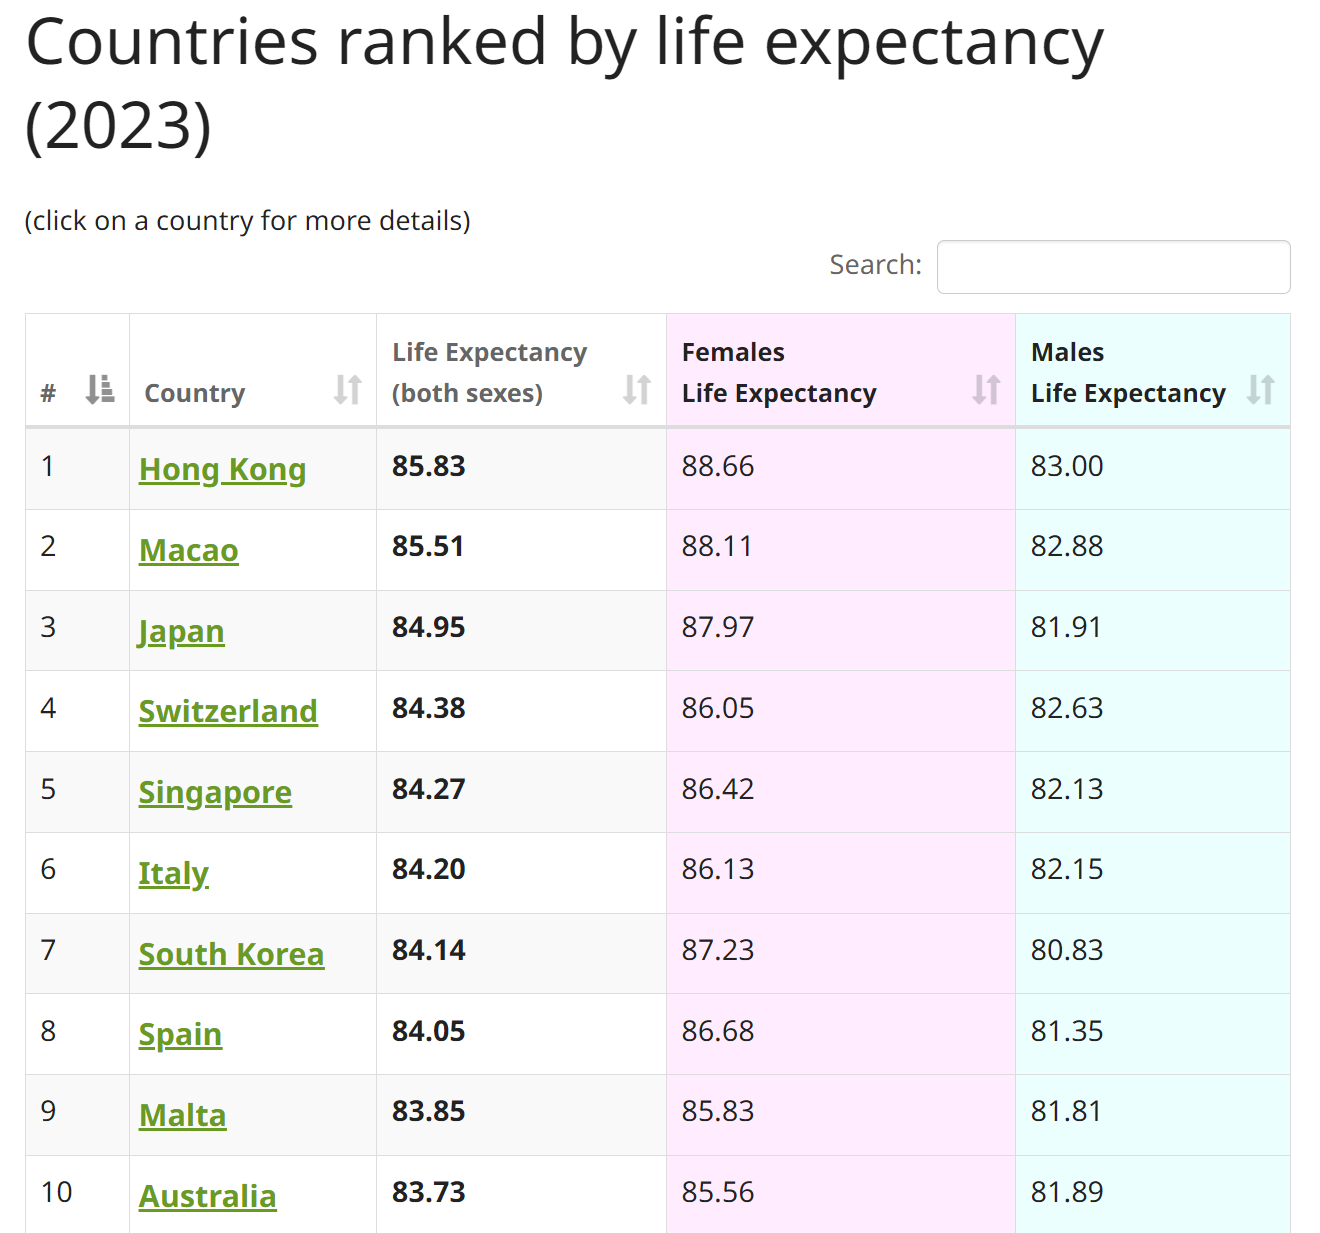

In [1171]:
import pandas as pd

# Assuming you've already loaded your data into a DataFrame called 'data'
# If you haven't loaded the data, you can do so with:
# data = pd.read_csv('/mnt/data/world-data-2023.csv')

# Now, let's check what the index of the DataFrame is
print("Current Index of the DataFrame:")
print(data.index)

# If you want to see the first few rows to better understand how the data and the index look:
print(data.head())


Current Index of the DataFrame:
Index([  0,   1,   2,   4,   5,   6,   7,   8,   9,  10,
       ...
       183, 184, 185, 186, 187, 188, 189, 191, 193, 194],
      dtype='int64', length=165)
   const              Country       GDP  Physicians per thousand  Gross tertiary education enrollment (%)  \
0    1.0          Afghanistan  1.91e+10                     0.28                                     0.10   
1    1.0              Albania  1.53e+10                     1.20                                     0.55   
2    1.0              Algeria  1.70e+11                     1.72                                     0.51   
4    1.0               Angola  9.46e+10                     0.21                                     0.09   
5    1.0  Antigua and Barbuda  1.73e+09                     2.76                                     0.25   

   Out of pocket health expenditure  Infant mortality  Tax revenue (%)  Life expectancy  Predicted Life Expectancy  
0                              0.78  